Import all necessary libraries


In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

Download songs lyrics from this link https://www.kaggle.com/paultimothymooney/poetry?select=eminem.txt

Use a tokenizer to vectorize the text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary)

**Standardize** the text to make it easier to process, for instance by converting it to lowercase or removing punctuation.

**Split** the text into units (called "tokens"), such as characters, words, or groups of words. This is called **Tokenization**.

**Convert** each such token into a numerical vector. This will usually involve first
indexing all tokens present in the data.

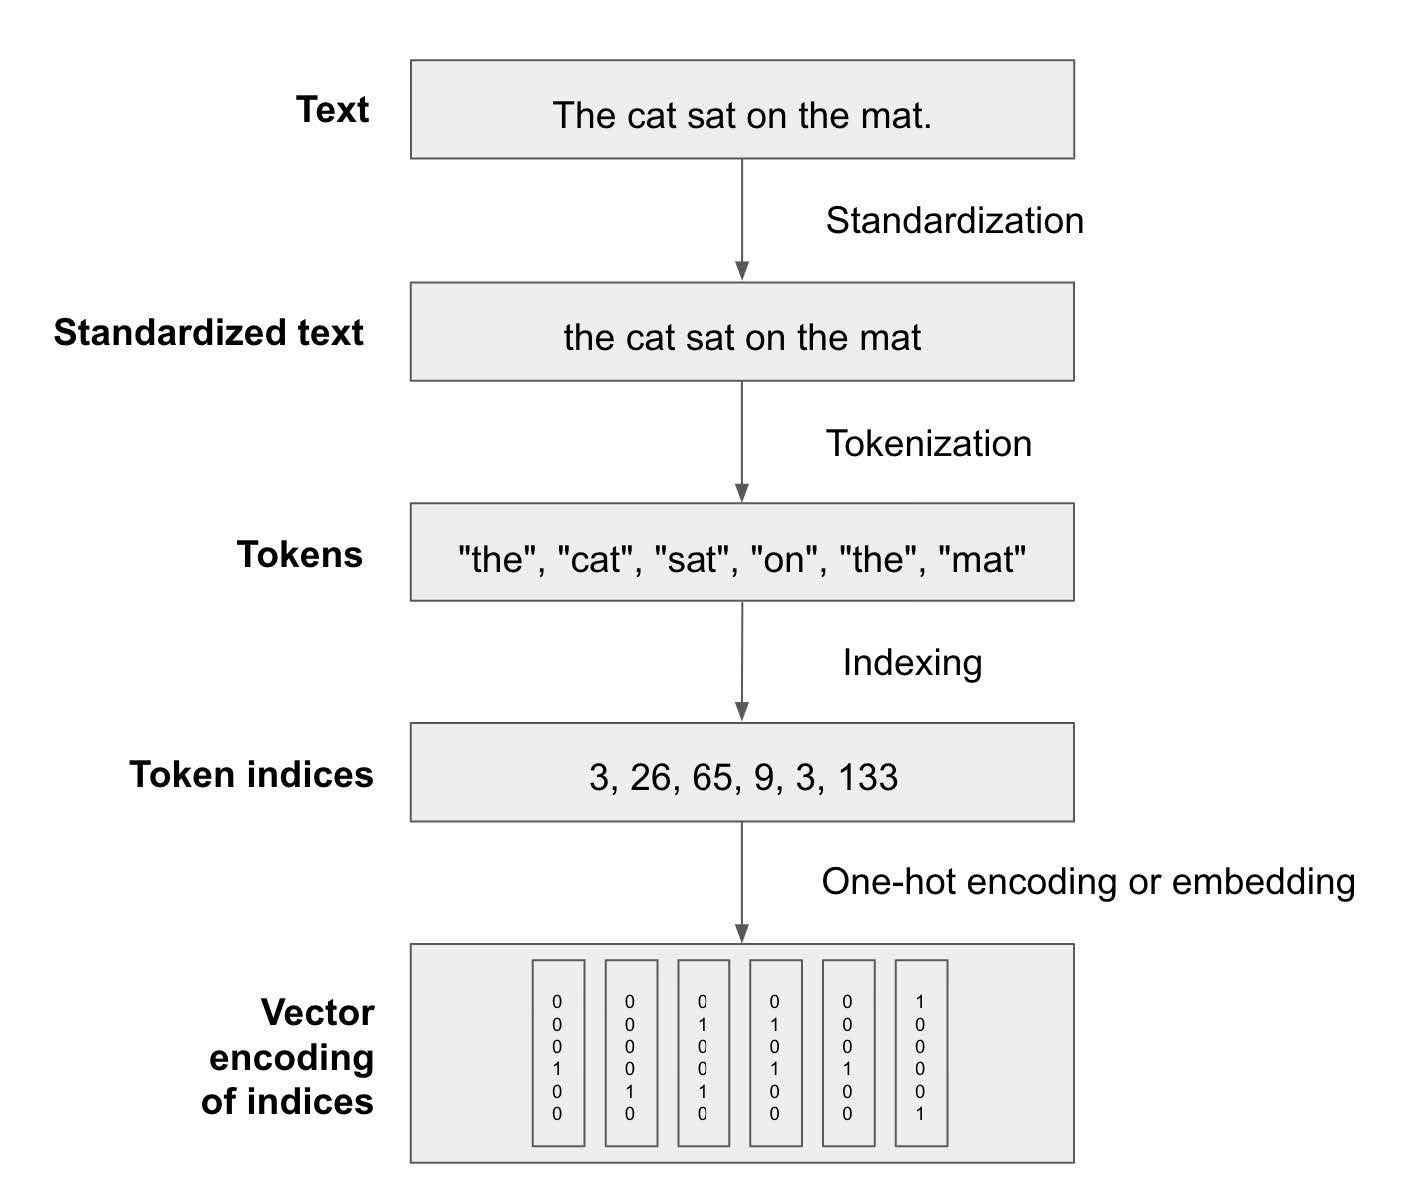

In [2]:
tokenizer = Tokenizer()
data = open('/content/eminem.txt').read()
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(tokenizer.word_index)
print(total_words)

{'i': 1, 'the': 2, 'you': 3, 'to': 4, 'a': 5, 'and': 6, 'my': 7, "i'm": 8, 'it': 9, 'me': 10, 'in': 11, 'that': 12, 'like': 13, 'of': 14, 'this': 15, 'but': 16, 'just': 17, 'so': 18, 'on': 19, 'is': 20, 'your': 21, "don't": 22, 'up': 23, 'with': 24, 'get': 25, 'for': 26, 'be': 27, "it's": 28, 'no': 29, 'all': 30, 'know': 31, 'what': 32, 'now': 33, 'out': 34, 'when': 35, 'they': 36, 'was': 37, 'not': 38, 'fuck': 39, "ain't": 40, 'got': 41, 'go': 42, 'at': 43, 'can': 44, 'back': 45, 'if': 46, 'shit': 47, 'we': 48, 'he': 49, 'do': 50, 'one': 51, 'from': 52, "'cause": 53, 'as': 54, 'never': 55, 'see': 56, 'think': 57, 'say': 58, 'his': 59, 'make': 60, "you're": 61, 'off': 62, 'oh': 63, "that's": 64, 'way': 65, 'down': 66, 'who': 67, 'her': 68, 'have': 69, "can't": 70, 'take': 71, 'right': 72, 'ass': 73, 'bitch': 74, 'too': 75, 'or': 76, 'name': 77, 'let': 78, 'want': 79, 'love': 80, 'then': 81, 'are': 82, "i'll": 83, 'these': 84, 'time': 85, 'am': 86, 'how': 87, 'been': 88, 'shady': 89, "'

Create n-grams from the sequences, pad all sequences to the length of the longest n-gram sequence.


Create predictors and labels. (predictors are all the words in a sequence but the last one and labels are the last words in a sequence)



In [3]:
input_sequences = []
for line in corpus:
# 	print(line)
# 	print(tokenizer.texts_to_sequences([line]))
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
print(input_sequences[:5,:])

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0 105   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0 105   1  37]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0 105   1  37  99]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0 105   1  37  99  42]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 105   1  37  99  42 843]]


Create a neural network with at least one LSTM layer, compile, fit, evaluate and visualize the training process.

In [4]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(total_words, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 100)           611500    
_________________________________________________________________
bidirectional (Bidirectional (None, 32, 300)           301200    
_________________________________________________________________
global_max_pooling1d (Global (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 6115)              1840615   
Total params: 2,753,315
Trainable params: 2,753,315
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
es = EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=1000, verbose=1, callbacks = [es], shuffle = False)
model.save('eminem')

Epoch 1/1000
1814/1814 [==============================] - 49s 23ms/step - loss: 6.4737 - accuracy: 0.0502
Epoch 2/1000
1814/1814 [==============================] - 41s 22ms/step - loss: 5.8922 - accuracy: 0.0756
Epoch 3/1000
1814/1814 [==============================] - 40s 22ms/step - loss: 5.5773 - accuracy: 0.0971
Epoch 4/1000
1814/1814 [==============================] - 40s 22ms/step - loss: 5.4291 - accuracy: 0.1138
Epoch 5/1000
1814/1814 [==============================] - 40s 22ms/step - loss: 5.3389 - accuracy: 0.1262
Epoch 6/1000
1814/1814 [==============================] - 40s 22ms/step - loss: 5.2600 - accuracy: 0.1392
Epoch 7/1000
1814/1814 [==============================] - 40s 22ms/step - loss: 5.1859 - accuracy: 0.1509
Epoch 8/1000
1814/1814 [==============================] - 41s 22ms/step - loss: 5.1167 - accuracy: 0.1631
Epoch 9/1000
1814/1814 [==============================] - 40s 22ms/step - loss: 5.0296 - accuracy: 0.1726
Epoch 10/1000
1814/1814 [=====================

INFO:tensorflow:Assets written to: eminem/assets


INFO:tensorflow:Assets written to: eminem/assets


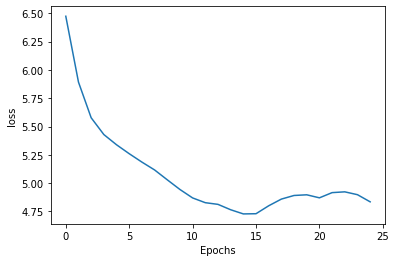

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.show()

In [8]:
model = load_model("eminem")

Use the trained model to generate lyrics from an initial sentence

In [23]:
seed_text = "Everything is going"
next_words = 8
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
# 	print(predicted)
	predicted = (np.argmax(model.predict(token_list), axis=-1))
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			print(output_word)
			break
	seed_text += " " + output_word
print(seed_text)

to
work
with
me
to
hear
me
and
Everything is going to work with me to hear me and
